<a href="https://colab.research.google.com/github/Jeevan-Neupane/PyTorch/blob/main/Completed_Workflow_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Putting All Steps together of Workflow

## Libraries

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check pytroch version

torch.__version__


'2.5.1+cu121'

>Create device agnostic code

>This means if we have got access to GPU we can use GPU else CPU

In [2]:
#setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## Data

### Create some data using the linear regression formula of y= weight*x + bias


In [3]:

weight =0.7;
bias = 0.3


# Create range values

start =0
end =1
step = 0.02


# Create X and y (feature and labels)

X = torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X +bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data

In [4]:
train_split = int(0.8*len(X));
X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test= X[train_split:],y[train_split:]

#### Function to visualize our data

In [5]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=  y_test, predictions=None):
  plt.figure(figsize=(10,7));
  #Plot the training data
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training Data");
  #Plot the test data
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data");

  #If predictions are provided
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions");

  plt.legend(prop={"size":14})

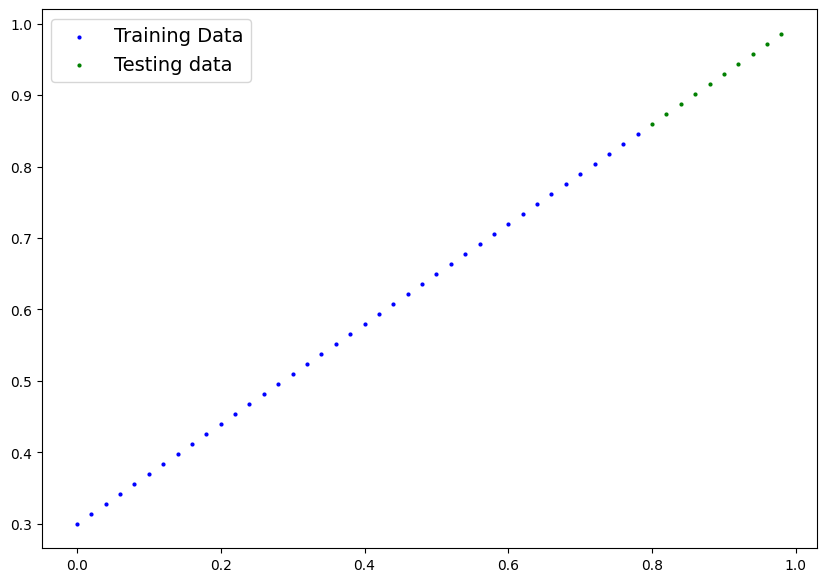

In [6]:
plot_prediction()

## Building a Model

In [7]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__();

    ## Use nn.Linear() for creatine the model parameters
    self.linear_layer = nn.Linear(in_features=1 , out_features=1);

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)



# set the manual seed

torch.manual_seed(42);

model_1 = LinearRegressionModel();
print(model_1)
print(model_1.state_dict())



LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [8]:
# check the model current device

next(model_1.parameters()).device

device(type='cpu')

In [9]:
# set the model to use the target device

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## Train Model

> For training we need
 <ol>
 <li>Loss funtion</li>
 <li>Optimizer </li>
 <li>Training Loop </li>
 <li> Testing Loop</li>
 </ol>


### Setup Loss Funcion

In [10]:
loss_fn = nn.L1Loss(); # same as MAE

### Setup Optimizer

In [12]:
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01);

### Let's writing a training loop

In [13]:
# Let's write a training loop

torch.manual_seed(42);

epochs = 200

## We ran to error if we don't have data in GPU as our model is already in GPU

X_train = X_train.to(device);
y_train = y_train.to(device);
X_test = X_test.to(device);
y_test = y_test.to(device);

for epoch in range(epochs):
  # Make Model Ready for Train
  model_1.train();

  #1. Forward pass
  y_pred = model_1(X_train);

  #2. Calculate Loss
  loss = loss_fn(y_pred,y_train);

  #3. Optimizer  zero grad

  optimizer.zero_grad();

  #4. Perform Backpropagation

  loss.backward()

  #5 . Optimizer Step

  optimizer.step()

  ### Testing Loop

  #0. Make it ready for testing
  model_1.eval();

  with torch.inference_mode():
    test_pred = model_1(X_test);

    test_loss = loss_fn(test_pred,y_test);

  # Printing out what's happening

  if epoch % 10 == 0:
    print (f"Epoch : {epoch} | Loss: {loss} | Test Loss: {test_loss}")  ;





Epoch : 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch : 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch : 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch : 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch : 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch : 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch : 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch : 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch : 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch : 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch : 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch : 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch : 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch : 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

In [14]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## Making and Evaluation Prediction

In [15]:
# Turing model into evaluation mode
model_1.eval();

# Make predictions on the test data

with torch.inference_mode():
  y_preds = model_1(X_test);

y_preds




tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

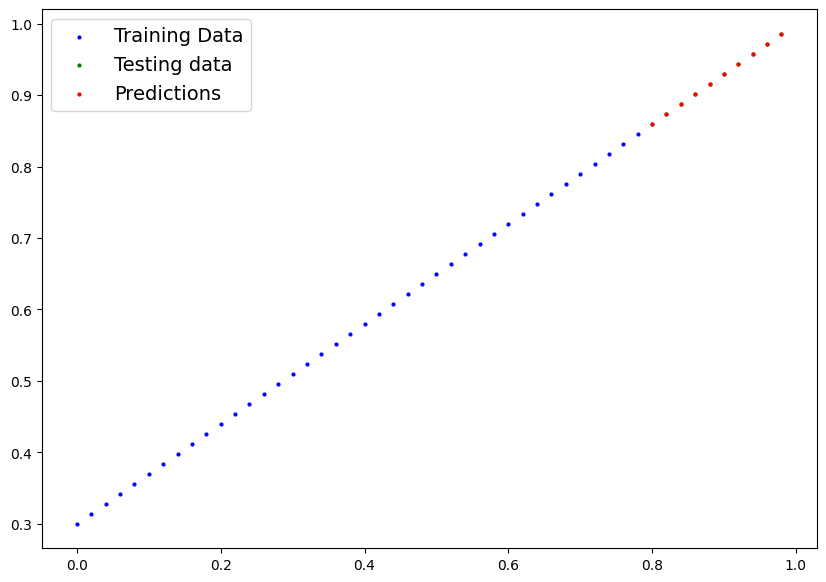

In [17]:
#Visual Representation

#since our model is in GPU our result is also  in GPU but Matplotlib works on CPU only so we have to change data to GPU with data agnostic code

plot_prediction(predictions=y_preds.cpu())

## Saving and Loading a trainde Model

### Save It

In [18]:
from pathlib import Path

#1. Create models directory

MODEL_PATH = Path("models");

MODEL_PATH.mkdir(parents=True,exist_ok=True)


#2. Create a model save path

MODEL_NAME = "complete_workflow.pth"

MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#3. Save the Model State Dict

print(f"Saving Model To: {MODEL_SAVE_PATH}");

torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)


Saving Model To: models/complete_workflow.pth


### Load it

In [23]:
# create new insttance of our model
loaded_model = LinearRegressionModel();


#load the saved model dict

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH));


# we have loaded in CPU make it in GPU

loaded_model.to(device)

<ipython-input-23-8bfd07b84c95>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH));


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [24]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Evaluate the Loaded Model

In [29]:
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test);

loaded_model_preds== y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')